## NDVI Images

In [1]:
import ee, eemont, geemap
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ee.Initialize()
Map = geemap.Map()

### Location

In [3]:
coop = ee.Geometry.Rectangle(-111.807, 41.748,-111.800, 41.743)
golf = ee.Geometry.Rectangle(-111.793, 41.747, -111.786, 41.742)
point = ee.Geometry.Point([-111.796, 41.745])

Map.addLayer(coop,{},'COOP')
Map.addLayer(golf,{},'GOLF')


Map.centerObject(point, 16)
Map

Map(center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['position', 'transparen…

## NDVI COOP

##### Landsat 8 COOP

In [4]:
landsat8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") #change

coop1 = ee.Image(landsat8
    .filterBounds(coop)
    .filterDate('2022-07-01', '2022-08-01')
    .sort('CLOUD_COVER_LAND')
    .first())

coop1 = coop1.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10'])


coop1 = coop1.multiply(0.0000275).add(-0.2)

In [5]:
ndvi1 = coop1.normalizedDifference(['SR_B5', 'SR_B4'])

In [6]:
vegPalette = ['white','red','yellow', 'green','blue']
Map.addLayer(ndvi1, {'min': 0, 'max': 1.0, 'palette': vegPalette},name = 'NDVI1')

Map

Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

##### Landsat 5 COOP

In [7]:
 landsat5 = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
 coop2 = ee.Image(landsat5
     .filterBounds(coop)
     .filterDate('1985-07-01', '1985-08-01')
     .sort('CLOUD_COVER_LAND')
     .first())

 coop2 = coop2.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5'])


 coop2 = coop2.multiply(0.0000275).add(-0.2)

In [8]:
 ndvi3 = coop2.normalizedDifference(['SR_B4', 'SR_B3'])

In [9]:
 vegPalette = ['white','red','yellow', 'green','blue']
 Map.addLayer(ndvi3, {'min': 0, 'max': 1.0, 'palette': vegPalette},name = 'NDVI3')

 Map

Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

#### Clip and Mean of COOP

In [10]:
ndvi1_coop = ndvi1.clip(coop)
ndvi3_coop = ndvi3.clip(coop)

In [11]:
ndvi1_mean = ndvi1.reduceRegion(reducer=ee.Reducer.mean(), geometry= coop, scale=30).get('nd')

In [12]:
ndvi3_mean = ndvi3.reduceRegion(reducer=ee.Reducer.mean(), geometry= coop, scale=30).get('nd')

In [13]:
print('Average NDVI:', ndvi1_mean.getInfo())

Average NDVI: 0.35923367759898656


In [14]:
print('Average NDVI:', ndvi3_mean.getInfo())

Average NDVI: 0.3505990223217568


## NDVI GOLF

##### Landsat 8 Golf

In [15]:
landsat8 =ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") #change

golf1 = ee.Image(landsat8
    .filterBounds(golf)
    .filterDate('2022-07-01', '2022-08-01')
    .sort('CLOUD_COVER_LAND')
    .first())

golf1 = golf1.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7'])


golf1 = golf1.multiply(0.0000275).add(-0.2)

In [16]:
ndvi2 = golf1.normalizedDifference(['SR_B5', 'SR_B4'])

In [17]:
vegPalette = ['white','red','yellow', 'green','blue']
Map.addLayer(ndvi2, {'min': 0, 'max': 1.0, 'palette': vegPalette},name = 'NDVI2')

Map

Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

##### Landsat 5 Golf

In [18]:
 landsat5 = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
 golf2 = ee.Image(landsat5
     .filterBounds(golf)
     .filterDate('1985-07-01', '1985-08-01')
     .sort('CLOUD_COVER_LAND')
     .first())

 golf2 = golf2.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5'])


 golf2 = golf2.multiply(0.0000275).add(-0.2)

In [19]:
 ndvi4 = golf2.normalizedDifference(['SR_B4', 'SR_B3'])

In [20]:
 vegPalette = ['white','red','yellow', 'green','blue']
 Map.addLayer(ndvi4, {'min': 0, 'max': 1.0, 'palette': vegPalette},name = 'NDVI4')

 Map

Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

#### Clip and Mean of Golf

In [21]:
ndvi2_golf = ndvi2.clip(golf)
ndvi4_golf = ndvi4.clip(golf)

In [22]:
ndvi2_mean = ndvi2.reduceRegion(reducer=ee.Reducer.mean(), geometry= golf, scale=30).get('nd')
ndvi4_mean = ndvi4.reduceRegion(reducer=ee.Reducer.mean(), geometry= golf, scale=30).get('nd')

In [23]:
print('Average NDVI:', ndvi2_mean.getInfo())

Average NDVI: 0.5359658714041826


In [24]:
print('Average NDVI:', ndvi4_mean.getInfo())

Average NDVI: 0.4060454849104186


### Add Color Bar

In [25]:
import eefolium

In [26]:
# Define the color palette and legend labels
#labels = ['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4']
labels = ['0', '0.2', '0.4', '0.6', '0.8', '1']
#vegPalette = ['#d73027', '#f46d43', '#fdae61', '#fee08b', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850']
vegPalette = ['#d73027', '#f46d43', '#fee08b', '#a6d96a', '#66bd63', '#1a9850']
# Create the map and add the NDVI layer
map = eefolium.Map()
# map.addLayer(ndvi1, {'min': -1, 'max': 1, 'palette': vegPalette}, 'NDVI')

# Add the legend to the map
Map.add_legend(colors=vegPalette, labels=labels, title='NDVI')



In [27]:
#vegPalette = ['#d73027', '#f46d43', '#fdae61', '#fee08b', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850']
#labels = ['0', '0', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4']

In [28]:
#Map.add_colorbar(vegPalette, vmin=0, vmax=1, caption='NDVI')

### Download Images 

In [29]:
# import ee
# import urllib

# ee.Authenticate()
# ee.Initialize()

# url = ndvi1_coop.getThumbURL({
#     'min': 0,
#     'max': 1.0,
#     'palette': vegPalette,
#     'region': coop,
#     'dimensions': '800x600'
# })

# urllib.request.urlretrieve(url, 'NDVI_coop1_image.png')

In [30]:
# import ee
# import urllib

# ee.Authenticate()
# ee.Initialize()

# url = ndvi2_golf.getThumbURL({
#     'min': 0,
#     'max': 1.0,
#     'palette': vegPalette,
#     'region': golf,
#     'dimensions': '800x600'
# })

# urllib.request.urlretrieve(url, 'NDVI_golf1_image.png')

In [31]:
# import ee
# import urllib

# ee.Authenticate()
# ee.Initialize()

# url = ndvi3_coop.getThumbURL({
#     'min': 0,
#     'max': 1.0,
#     'palette': vegPalette,
#     'region': coop,
#     'dimensions': '800x600'
# })

# urllib.request.urlretrieve(url, 'NDVI_coop2_image.png')

In [32]:
# import ee
# import urllib

# ee.Authenticate()
# ee.Initialize()

# url = ndvi4_golf.getThumbURL({
#     'min': 0,
#     'max': 1.0,
#     'palette': vegPalette,
#     'region': golf,
#     'dimensions': '800x600'
# })

# urllib.request.urlretrieve(url, 'NDVI_golf2_image.png')

# Timeseries plot of NDVI 

### Process/Merge Collections from both Satellites

In [33]:
stations = ee.FeatureCollection([
    ee.Feature(coop,{'station':0}),
    ee.Feature(golf,{'station':1})    
])

In [34]:
def maskSnow(image):
# // to Landsat 8 imagery.
    N = image.select('B5')
    G = image.select('B3')
    NDSI =image.normalizedDifference(['B3', 'B6'])
    snowPixels = (NDSI > 0.4) & (N >= 0.1) & (G > 0.11)
    return image.updateMask(~snowPixels)

In [35]:
L8 = (ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
      .filterBounds(stations)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['NDVI'])).map(maskSnow)

In [36]:
def maskSnow(image):
# // to Landsat 5 imagery.
    N = image.select('SR_B4')
    G = image.select('SR_B2')
    NDSI =image.normalizedDifference(['SR_B2', 'SR_B5'])
    snowPixels = (NDSI > 0.4) & (N >= 0.1) & (G > 0.11)
    return image.updateMask(~snowPixels)

In [37]:
L5 = (ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
      .filterBounds(stations)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['NDVI'])).map(maskSnow)

In [38]:
merged = L5.merge(L8)

In [39]:
collection = merged.select("NDVI").filter(ee.Filter.date('1985-07-01', '2022-07-01')).sort('system:time_start')

vis_params = {
  'min': 0.0,
  'max': 1.0,
  'palette': [#'#d73027', '#f46d43', '#fdae61', '#fee08b', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850'
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}

first_image = collection.first()

Map.addLayer(first_image, vis_params, "First image")
# Map.setCenter(-7.03125, 31.0529339857, 2)
Map


Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

In [40]:
labels = collection.aggregate_array("system:index").getInfo()
Map.add_time_slider(collection, vis_params, labels=labels, time_interval=1)
Map

Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

### Get Timeseries and Arrange Data

In [41]:
ts = merged.getTimeSeriesByRegions(collection = stations,
                               bands = ['NDVI'],
                               reducer = [ee.Reducer.mean()], #ee.Reducer.median()
                               scale = 30)

In [42]:
tsPandas = geemap.ee_to_pandas(ts)

In [43]:
tsPandas

,date,station,reducer,NDVI
0,1984-04-06T17:34:57,0,mean,0.084326
1,1984-04-06T17:34:57,1,mean,0.081332
2,1984-05-08T17:35:11,0,mean,0.304774
3,1984-05-08T17:35:11,1,mean,0.432883
4,1984-06-09T17:36:00,0,mean,0.195255
...,...,...,...,...
1331,2021-11-22T18:08:08,1,mean,0.514538
1332,2021-12-08T18:08:09,0,mean,NaN
1333,2021-12-08T18:08:09,1,mean,NaN
1334,2021-12-24T18:08:05,0,mean,NaN


In [44]:
tsPandas[tsPandas == -9999] = np.nan

In [45]:
tsPandas['date'] = pd.to_datetime(tsPandas['date'],infer_datetime_format = True)
#tsPandas.index = pd.to_datetime(tsPandas.index, format='%Y-%m-%d')

In [46]:
tsPandas

,date,station,reducer,NDVI
0,1984-04-06 17:34:57,0,mean,0.084326
1,1984-04-06 17:34:57,1,mean,0.081332
2,1984-05-08 17:35:11,0,mean,0.304774
3,1984-05-08 17:35:11,1,mean,0.432883
4,1984-06-09 17:36:00,0,mean,0.195255
...,...,...,...,...
1331,2021-11-22 18:08:08,1,mean,0.514538
1332,2021-12-08 18:08:09,0,mean,NaN
1333,2021-12-08 18:08:09,1,mean,NaN
1334,2021-12-24 18:08:05,0,mean,NaN


In [47]:
tsPandas_pivoted = tsPandas.pivot_table(index='date', columns= 'station', values='NDVI').reset_index()


In [48]:
tsPandas_pivoted.columns.name = None

In [49]:
tsPandas_pivoted

,date,0,1
0,1984-04-06 17:34:57,0.084326,0.081332
1,1984-05-08 17:35:11,0.304774,0.432883
2,1984-06-09 17:36:00,0.195255,0.053844
3,1984-06-25 17:36:14,0.367611,0.534300
4,1984-12-02 17:37:44,0.037412,-0.062306
...,...,...,...
454,2021-07-17 18:07:43,0.353555,0.482666
455,2021-09-03 18:08:02,0.403683,0.548711
456,2021-10-05 18:08:11,0.350219,0.511189
457,2021-10-21 18:08:14,0.361043,0.536456


In [50]:
tsPandas_pivoted.columns = ['date', 'station_0', 'station_1']

In [51]:
tsPandas_pivoted['Difference'] = tsPandas_pivoted['station_1'] - tsPandas_pivoted['station_0']

In [52]:
tsPandas_pivoted

,date,station_0,station_1,Difference
0,1984-04-06 17:34:57,0.084326,0.081332,-0.002993
1,1984-05-08 17:35:11,0.304774,0.432883,0.128109
2,1984-06-09 17:36:00,0.195255,0.053844,-0.141411
3,1984-06-25 17:36:14,0.367611,0.534300,0.166689
4,1984-12-02 17:37:44,0.037412,-0.062306,-0.099718
...,...,...,...,...
454,2021-07-17 18:07:43,0.353555,0.482666,0.129111
455,2021-09-03 18:08:02,0.403683,0.548711,0.145028
456,2021-10-05 18:08:11,0.350219,0.511189,0.160970
457,2021-10-21 18:08:14,0.361043,0.536456,0.175413


In [53]:
tsPandas_pivoted[tsPandas_pivoted.Difference >= 0.5] = np.nan

In [54]:
tsPandas_pivoted[tsPandas_pivoted.Difference <= -0.5] = np.nan

### Plot Difference Full Series

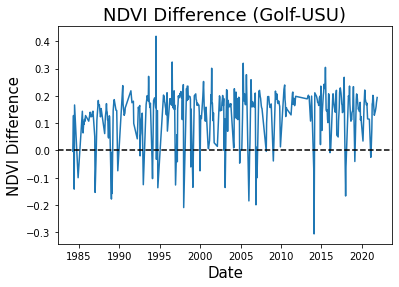

In [55]:
sns.lineplot(data=tsPandas_pivoted, x='date', y='Difference')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('NDVI Difference', fontsize = 15)
plt.title('NDVI Difference (Golf-USU)', fontsize = 18)

plt.axhline(y=0, color='black', linestyle='--')

plt.savefig('FullNDVI_plot.png', dpi=300, bbox_inches='tight')


## Filter only Summer months

In [56]:
print(tsPandas_pivoted)

                   date  station_0  station_1  Difference
0   1984-04-06 17:34:57   0.084326   0.081332   -0.002993
1   1984-05-08 17:35:11   0.304774   0.432883    0.128109
2   1984-06-09 17:36:00   0.195255   0.053844   -0.141411
3   1984-06-25 17:36:14   0.367611   0.534300    0.166689
4   1984-12-02 17:37:44   0.037412  -0.062306   -0.099718
..                  ...        ...        ...         ...
454 2021-07-17 18:07:43   0.353555   0.482666    0.129111
455 2021-09-03 18:08:02   0.403683   0.548711    0.145028
456 2021-10-05 18:08:11   0.350219   0.511189    0.160970
457 2021-10-21 18:08:14   0.361043   0.536456    0.175413
458 2021-11-22 18:08:08   0.320516   0.514538    0.194023

[459 rows x 4 columns]


In [57]:
tsPandas_pivoted = tsPandas_pivoted.set_index('date')

print(tsPandas_pivoted)

                     station_0  station_1  Difference
date                                                 
1984-04-06 17:34:57   0.084326   0.081332   -0.002993
1984-05-08 17:35:11   0.304774   0.432883    0.128109
1984-06-09 17:36:00   0.195255   0.053844   -0.141411
1984-06-25 17:36:14   0.367611   0.534300    0.166689
1984-12-02 17:37:44   0.037412  -0.062306   -0.099718
...                        ...        ...         ...
2021-07-17 18:07:43   0.353555   0.482666    0.129111
2021-09-03 18:08:02   0.403683   0.548711    0.145028
2021-10-05 18:08:11   0.350219   0.511189    0.160970
2021-10-21 18:08:14   0.361043   0.536456    0.175413
2021-11-22 18:08:08   0.320516   0.514538    0.194023

[459 rows x 3 columns]


In [58]:
#Convert index to DatetimeIndex object
tsPandas_pivoted.index = pd.to_datetime(tsPandas_pivoted.index, format='%Y-%m-%d')

# Filter data for June-October 1985-2022
filtered_data = tsPandas_pivoted.loc[
    (tsPandas_pivoted.index.month >= 5) & (tsPandas_pivoted.index.month <= 10) &
    (tsPandas_pivoted.index.year >= 1985) & (tsPandas_pivoted.index.year <= 2022)
]

In [59]:
print(filtered_data)

                     station_0  station_1  Difference
date                                                 
1985-06-12 17:37:54   0.338665   0.482379    0.143714
1985-07-14 17:37:44   0.350633   0.414933    0.064300
1985-08-15 17:37:27   0.347705   0.452970    0.105265
1985-08-31 17:37:16   0.344685   0.440350    0.095665
1985-09-16 17:37:03   0.350909   0.464560    0.113652
...                        ...        ...         ...
2021-06-15 18:07:38   0.361722   0.531743    0.170021
2021-07-17 18:07:43   0.353555   0.482666    0.129111
2021-09-03 18:08:02   0.403683   0.548711    0.145028
2021-10-05 18:08:11   0.350219   0.511189    0.160970
2021-10-21 18:08:14   0.361043   0.536456    0.175413

[305 rows x 3 columns]


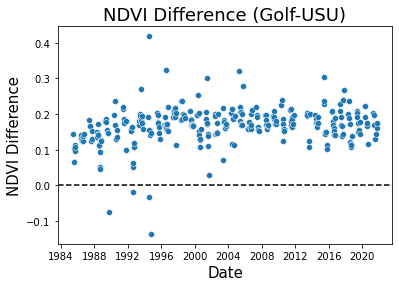

In [60]:
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='Difference')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('NDVI Difference', fontsize = 15)
plt.title('NDVI Difference (Golf-USU)', fontsize = 18)

plt.axhline(y=0, color='black', linestyle='--')


#plt.savefig('summerNDVI_plot.png', dpi=300, bbox_inches='tight')

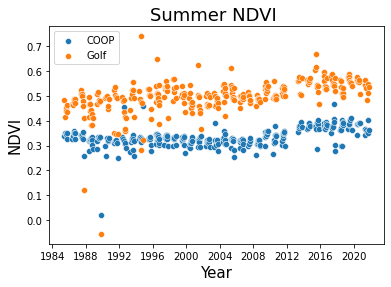

In [61]:
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='station_0', label = 'COOP')
plt.xlabel('Year', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.title('Summer NDVI ', fontsize=18)

sns.scatterplot(data=filtered_data, x=filtered_data.index, y='station_1', label = 'Golf')

plt.legend()

#plt.savefig('summerNDVI_scatter.png', dpi=300, bbox_inches='tight')

In [62]:
filtered_data.to_csv('summer_ndvi.csv', index=True)

### Get Annual Means from Summer Data

In [63]:
mean_diff = filtered_data.groupby(filtered_data.index.year)['Difference'].mean()

In [64]:
mean_station_0 = filtered_data.groupby(filtered_data.index.year)['station_0'].mean()

In [65]:
mean_station_1= filtered_data.groupby(filtered_data.index.year)['station_1'].mean()

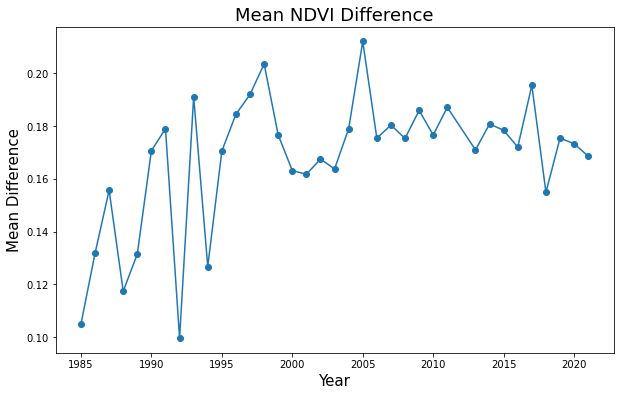

In [66]:
mean_diff.plot(kind='line', figsize=(10, 6), marker = 'o')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Difference', fontsize=15)
plt.title('Mean NDVI Difference', fontsize=18)

plt.savefig('NDVI_meandiff.png', dpi=300, bbox_inches='tight')

In [67]:
print(mean_diff)

date
1985    0.104897
1986    0.131691
1987    0.155668
1988    0.117373
1989    0.131455
1990    0.170649
1991    0.178983
1992    0.099618
1993    0.191139
1994    0.126693
1995    0.170495
1996    0.184498
1997    0.191975
1998    0.203567
1999    0.176583
2000    0.163121
2001    0.161680
2002    0.167486
2003    0.163738
2004    0.179012
2005    0.212084
2006    0.175388
2007    0.180377
2008    0.175303
2009    0.185950
2010    0.176604
2011    0.187100
2013    0.170962
2014    0.180760
2015    0.178397
2016    0.172005
2017    0.195453
2018    0.154890
2019    0.175398
2020    0.173306
2021    0.168576
Name: Difference, dtype: float64


In [68]:
print(filtered_data)

                     station_0  station_1  Difference
date                                                 
1985-06-12 17:37:54   0.338665   0.482379    0.143714
1985-07-14 17:37:44   0.350633   0.414933    0.064300
1985-08-15 17:37:27   0.347705   0.452970    0.105265
1985-08-31 17:37:16   0.344685   0.440350    0.095665
1985-09-16 17:37:03   0.350909   0.464560    0.113652
...                        ...        ...         ...
2021-06-15 18:07:38   0.361722   0.531743    0.170021
2021-07-17 18:07:43   0.353555   0.482666    0.129111
2021-09-03 18:08:02   0.403683   0.548711    0.145028
2021-10-05 18:08:11   0.350219   0.511189    0.160970
2021-10-21 18:08:14   0.361043   0.536456    0.175413

[305 rows x 3 columns]


### Filter Summer Data from 1990 to 1995

In [69]:
annual_data = filtered_data.loc['1990-05-01':'1996-05-01']

In [70]:
print(annual_data)

                     station_0  station_1  Difference
date                                                 
1990-05-09 17:28:01   0.296707   0.492669    0.195962
1990-06-10 17:27:58   0.256796   0.494465    0.237669
1990-06-26 17:27:57   0.332172   0.500917    0.168745
1990-08-13 17:27:46   0.318796   0.447591    0.128795
1990-09-14 17:27:38   0.324230   0.460974    0.136744
1990-09-30 17:27:26   0.329547   0.485528    0.155981
1991-05-12 17:30:11        NaN   0.351893         NaN
1991-05-28 17:30:27   0.309528   0.524042    0.214514
1991-06-13 17:30:33   0.318162   0.536794    0.218631
1991-07-15 17:31:05   0.317550   0.503987    0.186437
1991-07-31 17:31:16   0.320774   0.495722    0.174948
1991-09-01 17:31:32        NaN   0.344613         NaN
1991-10-03 17:31:46   0.310655   0.491076    0.180421
1991-10-19 17:31:57   0.248097   0.347046    0.098949
1992-05-14 17:31:29   0.335107   0.493360    0.158253
1992-05-30 17:31:21   0.328028   0.480674    0.152646
1992-07-17 17:30:46   0.3194

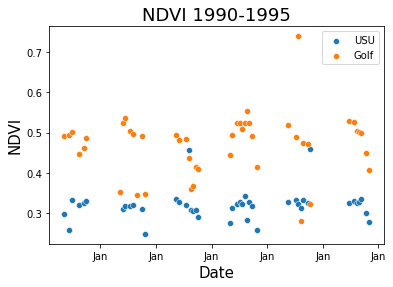

In [71]:
import matplotlib.dates as mdates

sns.scatterplot(data=annual_data, x=annual_data.index, y='station_0', label = 'USU', marker = 'o')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('NDVI', fontsize = 15)
plt.title('NDVI 1990-1995', fontsize = 18)

sns.scatterplot(data=annual_data, x=annual_data.index, y='station_1', label = 'Golf', marker = 'o')

date_format = mdates.DateFormatter('%b')  # Format to show month abbreviation
plt.gca().xaxis.set_major_formatter(date_format) 

plt.legend()

#plt.savefig('NDVI_annual_plot.png', dpi=300, bbox_inches='tight')

In [72]:
print(annual_data)

                     station_0  station_1  Difference
date                                                 
1990-05-09 17:28:01   0.296707   0.492669    0.195962
1990-06-10 17:27:58   0.256796   0.494465    0.237669
1990-06-26 17:27:57   0.332172   0.500917    0.168745
1990-08-13 17:27:46   0.318796   0.447591    0.128795
1990-09-14 17:27:38   0.324230   0.460974    0.136744
1990-09-30 17:27:26   0.329547   0.485528    0.155981
1991-05-12 17:30:11        NaN   0.351893         NaN
1991-05-28 17:30:27   0.309528   0.524042    0.214514
1991-06-13 17:30:33   0.318162   0.536794    0.218631
1991-07-15 17:31:05   0.317550   0.503987    0.186437
1991-07-31 17:31:16   0.320774   0.495722    0.174948
1991-09-01 17:31:32        NaN   0.344613         NaN
1991-10-03 17:31:46   0.310655   0.491076    0.180421
1991-10-19 17:31:57   0.248097   0.347046    0.098949
1992-05-14 17:31:29   0.335107   0.493360    0.158253
1992-05-30 17:31:21   0.328028   0.480674    0.152646
1992-07-17 17:30:46   0.3194

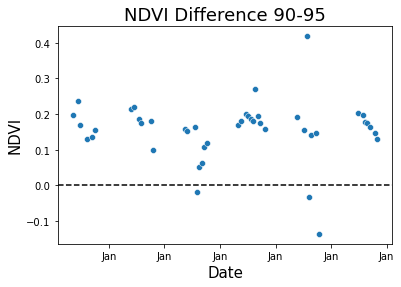

In [73]:
sns.scatterplot(data=annual_data, x=annual_data.index, y='Difference', marker = 'o')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('NDVI', fontsize = 15)
plt.title('NDVI Difference 90-95', fontsize = 18)

plt.axhline(y=0, color='black', linestyle='--')

date_format = mdates.DateFormatter('%b')  # Format to show month abbreviation
plt.gca().xaxis.set_major_formatter(date_format) 

#plt.savefig('NDVI_annual_diff.png', dpi=300, bbox_inches='tight')